In [1]:
import seaborn
import numpy as np
import pandas as pd
import ranking as r
import validate_model as vm
import create_model as cm
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

[INFO] This trial license of GraphLab Create is assigned to lax.cary@gmail.com and will expire on October 09, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-2518 - Server binary: /home/ubuntu/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1442430463.log
[INFO] GraphLab Server Version: 1.5.2


PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 219326 observations with 29245 users and 64 items.
PROGRESS:     Data prepared in: 0.113588s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations            

In [2]:
athlete_ratings, segment_ratings, models = cm.df_to_latent_features(training_df)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 219326 observations with 29245 users and 64 items.
PROGRESS:     Data prepared in: 0.105053s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations            

In [3]:
vm.testing_rmse(models, training_df)

{'downhill': 0.50214493071084354,
 'total': 0.37579578858688023,
 'uphill': 0.23116965070424911}

In [4]:
vm.evaluate_latent_feature_correlations(training_df, segment_ratings)

,total_rating,uphill_rating,downhill_rating
seg_average_grade,0.785023,-0.249511,-0.080254
seg_distance,0.194915,-0.105974,0.036072
seg_maximum_grade,0.184760,0.007586,-0.109942
total_rating,1.000000,-0.676761,-0.232835
uphill_rating,-0.676761,1.000000,NaN
downhill_rating,-0.232835,NaN,1.000000


In [9]:
lb = r.Leaderboards(training_df[['athlete_id', 'seg_average_grade', 'average_speed']])
lb.store(athlete_ratings)

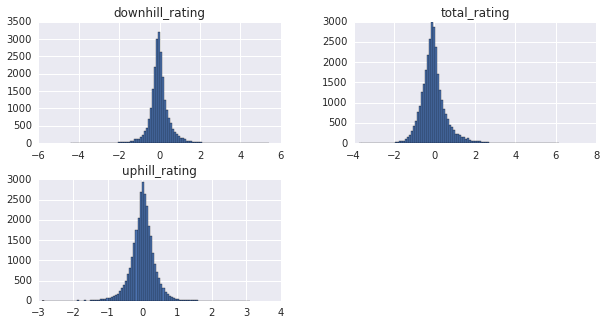

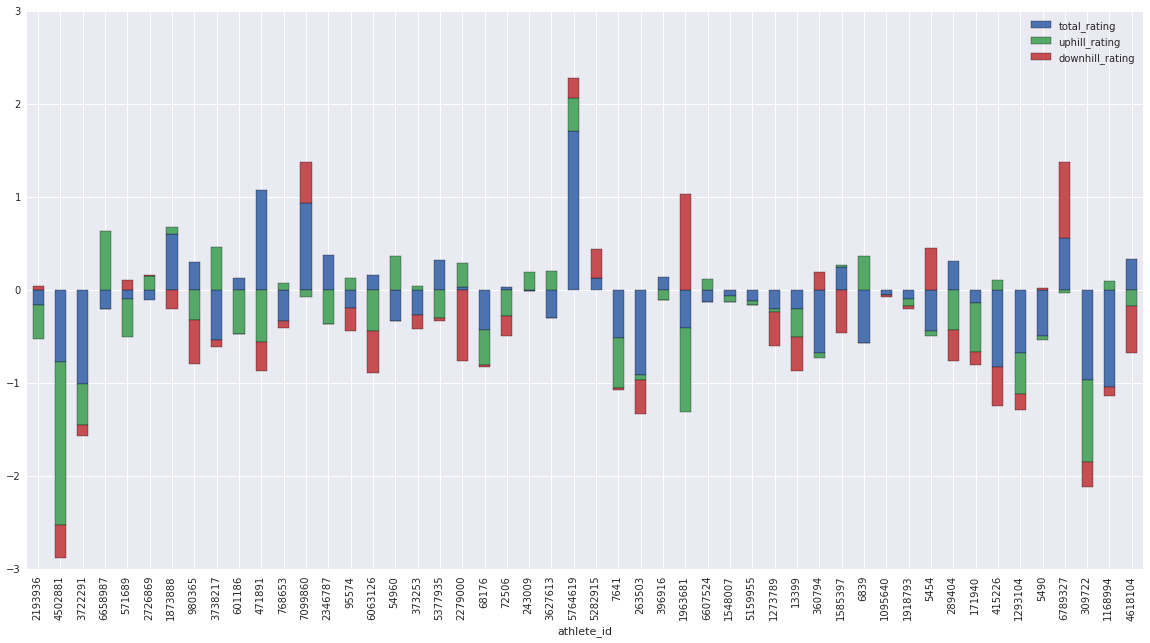

In [7]:
vm.plot_ratings(athlete_ratings)

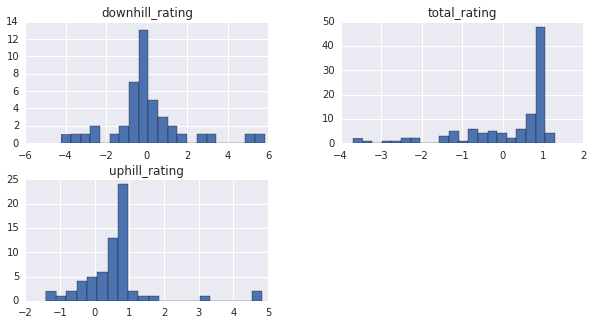

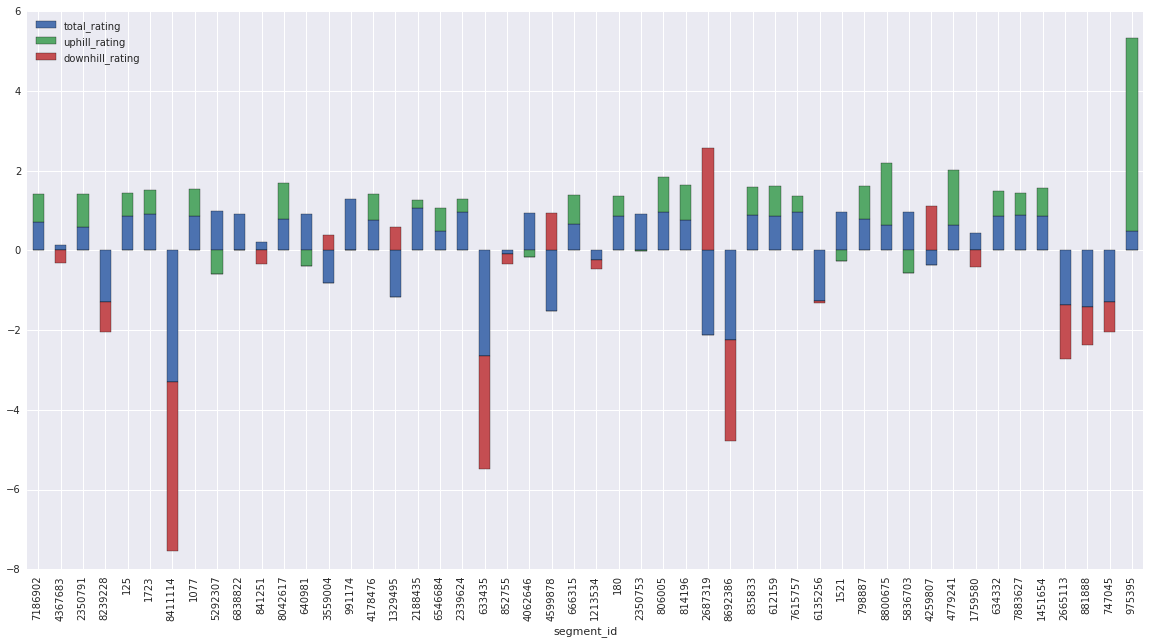

In [8]:
vm.plot_ratings(segment_ratings)